# Figure 5 — Directed evolution of AraC-LOV variants using Retron-Assisted, Multiplexed, Phage Gene Evolution (RAMPhaGE) and POGO-PANCE.

This notebook reproduces **Figure 5** from the main manuscript.

---

### Figure Summary

<div style="text-indent:-2em; padding-left:2em"><strong>(A)</strong> Retron Recombineering Circuit Diagram</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(B)</strong> Chromatogram of phage pooled sequencing data of a non-targeting retron, a retron encoding an edit at a single position but with a disabled reverse transcriptase, and a retron encoding an edit at a single position with a working reverse transcriptase</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(C)</strong> Overview of Retron recombineering library preparation</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(D)</strong> Editing rates of phages passaged over two retron recombineering libraries, one encoding all possible amino acid edits across the AsLOV2 domain (DMS Library), and another encoding linkers of variable lengths at the left and right junctions of the domain insertion site at AraC S170 (Linker Library). Total editing of phages with an edit versus wt are shown as a pie chart; all performed with Illumina sequencing.</div>
<div style="text-indent:-2em; padding-left:2em"><strong>(E)</strong> Comparison of amino acid mutational coverage of DP6 versus the DMS library using Illumina sequencing</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(F)</strong> Editing specificity of the DMS retron library, showing both positional specificity of the DMS library editing all amino acids at only AsLOV2 and not AraC, and the mapped library coverage of the retron plasmid library input versus the editing frequencies reported in the phages; all used Illumina sequencing</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(G)</strong> Overview of POGO-PANCE evolution of AraC R2 S170 LOV using the linker library, enrichment rates overtime are shown using Nanopore data</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(H)</strong> Dot plot of enrichment after initial linker mutagenesis versus the enrichment of linker variants in the final day.</div>
<div style="text-indent:-2em; padding-left:2em"><strong>(I)</strong> Bar chart comparing AraC S170 Variants in the dark or light, WT, R2, the best original pogo-pance variant, and 5 selected enriched linkers from the linker evolution are shown on a log scale.</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(J)</strong> Alphafold3 structure comparison of AraC S170 LOV and AraC R2 S170 LOV LdelK (a linker variant).</div>  

---


## Notebook Setup
----------------------------

Run the following cell to import all required libraries, define plotting settings, and configure the environment for data analysis and visualization.

In [8]:
# --- Import necessary modules ---
import os
import sys
os.chdir("..")
import json
import pickle as pkl
from importlib import reload
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from Bio import SeqIO
from Bio.SeqIO import QualityIO
from utils import dna_rev_comp, translate_dna2aa
from scripts.preprocessing_functions import *
from scripts.plotting import *
from scripts.Illumina_functions import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties

# ======================== PLOTTING SETTINGS ========================

# --- Custom color map for mutation visualization ---
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"   # Light pastel green
], N=256)

# --- Seaborn theme configuration ---
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 1
}
sns.set_theme(context="paper", style='ticks', palette="Greys_r", rc=custom_params)

# --- General matplotlib settings ---
fs = 8  # font size
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({
    'font.family': 'Avenir Next',
    'font.weight': 'demi', 
    'font.size': fs,
    'text.color': '#231F20',
    'axes.labelcolor': '#231F20',
    'xtick.color': '#231F20',
    'ytick.color': '#231F20',
    'axes.edgecolor': '#231F20',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'pdf.fonttype': 42,
    'text.usetex': False
})
sns.set_context("paper", rc={
    "font.size": fs,
    "axes.titlesize": fs + 1,
    "axes.labelsize": fs,
    "axes.linewidth": 1,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "legend.title_fontsize": fs + 1
})

avenir_fp = FontProperties(family='Avenir Next', weight='demi', size=fs)

# ======================== LAYOUT PARAMETERS ========================

# --- Pre-defined figure dimensions for multi-panel plots ---
hi = 10.5 * 0.75
wi3 = 2.24
wi2 = 4.76
wi1 = 7.24
nr = 5

# --- Utility for shortening sample names ---
short_fn = np.vectorize(lambda x: x[:5])

## Figure 5A: Retron Recombineering Circuit Diagram
----------------------------

Overview of the retron recombineering system. Infection with a selection phage (SP) and addition of anhydrotetracycline (aTc) induce gene III expression, while IPTG activates a recombitron operon encoding CspRecT, MutL E32K, and Eco1 reverse transcriptase. Expressed retrons are reverse-transcribed into ssDNA donors containing a central predefined edit flanked by homology arms, enabling targeted editing of the SP genome during replication.

![Alt Text](/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/figure_notebooks/figure_illustrations/Figure_5A.png)

## Figure 5B: Chromatogram of phage pooled sequencing data of a non-targeting retron, a retron encoding an edit at a single position but with a disabled reverse transcriptase, and a retron encoding an edit at a single position with a working reverse transcriptase.
----------------------------
Representative Sanger sequencing chromatograms of phage pools edited with a single retron. Expanded data in Figure S9.

Chromatograms were generated from `.ab1` sequencing files using the Python script `scripts/impose_enrichment_on_pymol.py`, which overlays base signal intensities across aligned reads. Final figure layout and annotations were created in Adobe Illustrator.

![Alt Text](/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/figure_notebooks/figure_illustrations/Figure_5B.png)

## Figure 5C: Overview of Retron recombineering library preparation
----------------------------

Schematic of RAMPhaGE editing library construction. Barcoded oligo pools were cloned into a recombineering plasmid and transformed into SP-infectable E. coli, enabling pooled editing. Additional details in Figure S10. Figure created with Adobe Illustrator.

![Alt Text](/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/figure_notebooks/figure_illustrations/Figure_5C.png)

## Figure 5D: Editing rates of phages passaged over two retron recombineering libraries, one encoding all possible amino acid edits across the AsLOV2 domain (DMS Library), and another encoding linkers of variable lengths at the left and right junctions of the domain insertion site at AraC S170 (Linker Library). Total editing of phages with an edit versus wt are shown as a pie chart; all performed with Illumina sequencing.

----------------------------

Editing outcomes showing the percentage of edited versus wild-type phages from retron libraries targeting either the AsLOV2 domain (DMS), the linker region (SG or GS variants), or both.

In [9]:
def generate_piechart(variant, bc):
    blast_dir = f'/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/data/Illumina/{variant}/blast/alignments/{bc}'
    blast_dir = Path(blast_dir)
    wildtype_count = 0
    total_reads = 0
    # Loop over all BLAST result files
    for file in blast_dir.glob("*.out"):
        with open(file, "r") as f:
            data = json.load(f)
        
        hits = data["BlastOutput2"][0]["report"]["results"]["search"]["hits"]
        for hit in hits:
            hsps = hit["hsps"]
            for hsp in hsps:
                if hsp["identity"] == hsp["align_len"]: 
                    wildtype_count += 1
                total_reads += 1

    wildtype_percent = (wildtype_count / total_reads) * 100
    mutated_percent = 100 - wildtype_percent

    fig, ax = plt.subplots(figsize=(6, 6))

    wedges, _ = ax.pie(
        [wildtype_percent, mutated_percent],
        colors=["white", "#69b3a2"],
        startangle=90,
        wedgeprops=dict(edgecolor='black', linewidth=4)
    )

    plt.title("Total Reads: Wild Type vs Mutated", fontsize=20)
    plt.tight_layout()

    ax.text(-0.7, 0.1, f"WT\n{round(wildtype_percent, 1)}%", 
        ha='center', va='center', fontsize=20, weight='bold')

    ax.text(0.5, 0.3, f"Edited\n{round(mutated_percent, 1)}%", 
        ha='center', va='center', fontsize=20, weight='bold')
    # plt.savefig(f"/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/{variant}/combined/plots/AA/{variant}_{bc}_total_mutated_reads_pie.pdf", bbox_inches='tight', dpi=600)
    # plt.savefig(f"/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/{variant}/combined/plots/AA/{variant}_{bc}_total_mutated_reads_pie.png", bbox_inches='tight')
    plt.show()


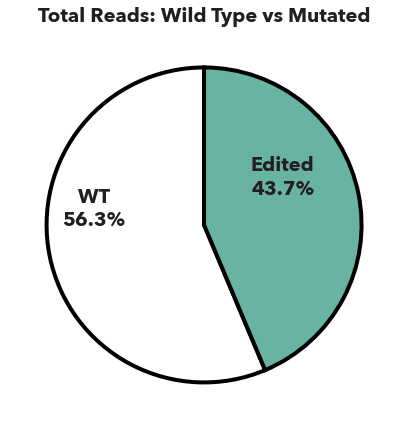

In [10]:
# === Compare total reads: retron libraries targeting the AsLOV2 domain (DMS) ===
generate_piechart('R35', 'BC2')

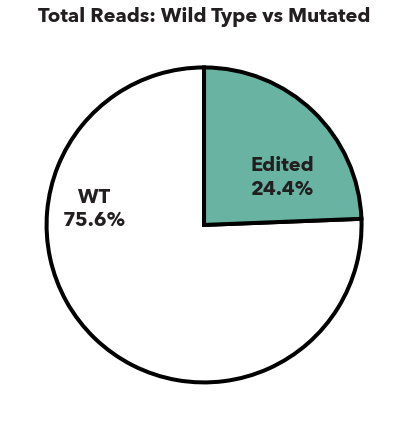

In [11]:
# === Compare total reads: retron libraries targeting the linker region (SG or GS variants) ===
generate_piechart('R35', 'BC1')

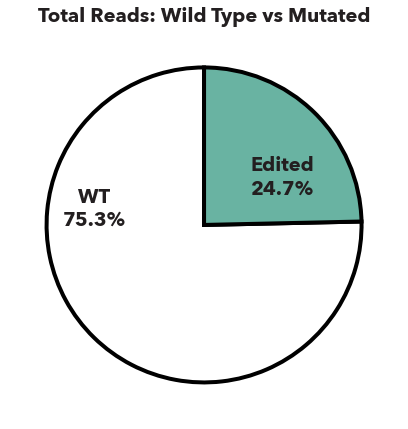

In [12]:
# === Compare total reads: retron libraries targeting both the AsLOV2 domain and the linker regions ===
generate_piechart('R36', 'BC1')

## Figure 5E: Comparison of amino acid mutational coverage of DP6 versus the DMS library using Illumina sequencing
----------------------------

Comparison of amino acid-level mutation coverage following a single passage using either the plLacO1-DP6 mutagenesis system or the DMS retron library. The number of occurrences of each amino acid in the reference sequence are plotted on the y-axis. Additional comparisons in Figure S11.

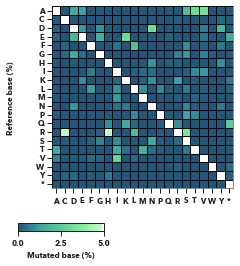

In [15]:
# ======================== PLOT ENRICHMENT AND MUTATIONAL SPECTRUM DATA ========================

amplicon_AraCLOV2 = 'CGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTG'
# --- Sequence region of interest ---
start_LOV2  = "ttagccacaa".upper() 
end_LOV2 = "cggccaaa".upper() 

LOV2_gene = amplicon_AraCLOV2[amplicon_AraCLOV2.index(start_LOV2):amplicon_AraCLOV2.index(end_LOV2)+len(end_LOV2)]

# --- Define variant name and data type ---
variant = "DP6" 
dat = "AA"
variant_name = "P01_DP6_LOV2" 

# --- Set paths to input and output folders ---
homedir = f"/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/data/fastq/{variant_name}"
Folder = f"/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/{variant}/combined/" 

# --- Load amino acid-level mutational spectrum (percentage values) ---
mut_spectrum_AA_perc = pd.read_csv(f"{Folder}/enrichments/{dat}/{variant}_BC1_S1_combined_roiTrue_{dat}_mut_spec.csv", index_col = 0)
# --- Load enrichment matrix (relative mutation enrichment scores) ---
enrichment = pd.read_csv(f"{Folder}/enrichments/{dat}/{variant}_BC1_S1_combined_roiTrue_{dat}_enrichment_relative.csv", index_col = 0)
# --- Define folder to store output plots ---
FigFolder = Folder+ f"/plots/{dat}/"

# --- Identify positions (columns) in enrichment matrix that are entirely NaN ---
empty_cols = enrichment.columns[enrichment.isna().all()]

# --- Replace all NaN values in the enrichment matrix with 0 (required for calculations) ---
enrichment.fillna(0, inplace=True)
# --- Set reference sequence based on data type (AA or DNA) ---
ref = translate_dna2aa(LOV2_gene) if dat != "DNA" else LOV2_gene

# --- Calculate amino acid-level mutational spectrum from enrichment data ---
#     Returns both absolute counts and percentage distribution of mutations
mut_spectrum_AA,mut_spectrum_AA_perc = calc_mut_spectrum_from_enrichment(enrichment, ref_seq=ref, data_type=dat)

# --- Plot mutational spectrum as a heatmap (AA × AA, percentage-based) ---
plot_mutation_spectrum(mut_spectrum_AA_perc, data_type=dat, colormap=custom_cmap)

################ R1 ################
46808 alignments before filtering for LOV2 insertion site
40278 alignments after filtering for LOV2 insertion site
117 sequences are excluded, since they do not cover the start (R1) or end (R2) of the amplicon sequence.
################ R2 ################
42806 alignments before filtering for LOV2 insertion site
33793 alignments after filtering for LOV2 insertion site
84 sequences are excluded, since they do not cover the start (R1) or end (R2) of the amplicon sequence.
288 sequences with off target indels are excluded
39873 sequences are included in the enrichment analysis
359 sequences with off target indels are excluded
33350 sequences are included in the enrichment analysis


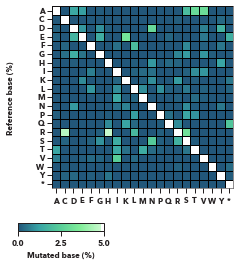

In [16]:
# ======================== ANALYSIS PARAMETERS ========================

# --- Path to input FASTQ files and config ---
homedir =  "/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/data/Illumina/P01_DP6_LOV2" 

Bc = "BC1" # Barcode to be analyzed (must match one used during demultiplexing)
read_dirs = ["R1", "R2"] # Read directions to include in the analysis
Section = "S1" # Section/amplicon to be analyzed
data_type = "AA" # Mutation type: "AA" = amino acids, "Nt" = nucleotides


all_alignments = {}

# --- Sequence region of interest ---
LOV_startseq = "ttagccacaa".upper()
LOV_endseq = "cggccaaa".upper()

# --- Load variant information from config ---
with open(f"{homedir}/config.json") as f:
  config = json.load(f)

variant = config["variant"]

# --- Output folder for storing figures and results generated by the notebook ---
FigFolder = f"{os.getcwd()}/final_output/{variant}_w_nb/"
if not os.path.exists(FigFolder):
    os.makedirs(FigFolder)

# ====================== LOAD AND FILTER BLAST ALIGNMENTS ======================

# --- Container to store parsed alignment and coverage data for each read direction ---
all_alignments = {}
all_coverages = {}

# --- Specify the data type to be analyzed (e.g., "AA" for amino acids) ---
data_type = "AA"

# --- Loop through both read directions: R1 and R2 ---
for read_dir in read_dirs:

    # --- Load BLAST output JSON file ---
    print("################",  read_dir,   "################")
    with open(f"{homedir}/blast/alignments/{variant}_{Bc}_{Section}_Nt_filt_{read_dir}.out", "r") as file:
        blast_output = json.load(file)

    # --- Load the reference DNA sequence ---
    amplicon_seq = str(SeqIO.read(f"{homedir}/references/{variant}_{Bc}_{Section}_Nt_filt_ref.fasta", "fasta").seq)
    
    # --- Translate DNA reference to amino acid sequence if needed ---
    amplicon_AA = translate_dna2aa(amplicon_seq)

    # --- Extract BLAST hits from the loaded JSON ---
    blast_alignments = blast_output["BlastOutput2"][0]["report"]["results"]["search"]["hits"].copy()
    
    # --- Define start and end indices of the LOV2 region within the DNA reference ---
    LOV2_startidx = amplicon_seq.index(LOV_startseq)
    LOV2_endidx = amplicon_seq.index(LOV_endseq) + len(LOV_endseq)
    print(len(blast_alignments), "alignments before filtering for LOV2 insertion site")

    # --- Filter BLAST hits: keep only those that span the LOV2 region with a ±10 nt margin ---
    filter_for_region = LOV2_startidx if read_dir=="R1" else LOV2_endidx 

    blast_alignments = [alignment for alignment in blast_alignments if alignment["hsps"][0]["query_from"] <= filter_for_region-10 and alignment["hsps"][0]["query_to"] >= filter_for_region+10]
    print(len(blast_alignments), "alignments after filtering for LOV2 insertion site")

    # --- Parse and restructure alignments to extract aligned sequences and coverage data ---
    alignments, coverages = restructure_alignments(blast_alignments, query_seq=amplicon_seq, read_dir=read_dir)
    
    # --- Store the results per read direction ---
    all_alignments[read_dir] = alignments
    all_coverages[read_dir] = coverages
# ====================== CHARACTERIZE MUTATIONAL ENRICHMENTS ======================

# --- Container for enrichment results from both read directions ---
all_enrichments = {"R1":{}, "R2":{}}

# --- Loop through each read direction (R1 and R2) ---
for read_dir in read_dirs: 

    # --- Analyze alignments: get all variant calls, indels, and enrichment metrics ---
    all_variants, indels,  enrichment_counts, enrichment_relative = characterize_DMS_blast_alignment(all_alignments[read_dir], amplicon_seq, data_type=data_type,read_dir=read_dir, exclude_not_covered_regions=False)
   
    # --- Store results in a structured dictionary ---
    all_enrichments[read_dir]["all_variants"] = pd.DataFrame.from_dict(all_variants)
    all_enrichments[read_dir]["indels"] = indels
    all_enrichments[read_dir]["enrichment_counts"] = enrichment_counts
    all_enrichments[read_dir]["enrichment_relative"] = enrichment_relative

# ====================== COMBINE R1 AND R2 ENRICHMENTS ======================

# --- Set correct reference depending on analysis type ---
reference = amplicon_AA if data_type == "AA" else amplicon_seq

# --- Combine variant counts from R1 and R2 ---
total_variants = all_enrichments[read_dirs[0]]["all_variants"] + all_enrichments[read_dirs[1]]["all_variants"]

# --- Combine enrichment counts (mutations over wild type) ---
total_enrichment = all_enrichments[read_dirs[0]]["enrichment_counts"] + all_enrichments[read_dirs[1]]["enrichment_counts"]

# --- Calculate relative enrichment (mutation frequency per position) ---
total_relative_enrichment = total_enrichment/total_variants.sum()

# ====================== COMBINE INDELS ======================

# --- Sum indel counts from both read directions ---
total_indels = all_enrichments[read_dirs[0]]["indels"] + all_enrichments[read_dirs[1]]["indels"]

# --- Calculate indel frequency using total raw coverage before filtering ---
total_indels_freq = total_indels/(all_coverages[read_dirs[0]]+all_coverages[read_dirs[1]]) # here, we use the coverage calculated before indel reads were filtered out

# ====================== MASK LOW-COVERAGE POSITIONS ======================

# --- Get total coverage per position ---
enrichment_coverages = total_variants.sum()

# --- Set enrichment values to NaN for positions with coverage below threshold (e.g. 2000 reads) ---
total_relative_enrichment.loc[:,enrichment_coverages < 2000] = np.nan
# --- Fill NaN values with 0 for downstream calculations ---
# NaNs typically come from positions filtered out due to low coverage
total_relative_enrichment.fillna(0, inplace=True)

# --- Compute the mutational spectrum from the enrichment matrix ---
# `x` = absolute counts (optional), `y` = percentage-based mutation spectrum
x, y = calc_mut_spectrum_from_enrichment(
    total_relative_enrichment,
    ref_seq=reference,
    data_type="AA"
)

# --- Plot the mutational spectrum as a barplot or heatmap depending on implementation ---
plot_mutation_spectrum(
    y,
    data_type="AA",
    colormap=custom_cmap  # Use custom colormap for consistent styling
)

## Figure 5F: Editing specificity of the DMS retron library, showing both positional specificity of the DMS library editing all amino acids at only AsLOV2 and not AraC, and the mapped library coverage of the retron plasmid library input versus the editing frequencies reported in the phages; all used illumina sequencing
----------------------------

Per-position mutation frequencies after a single passage of the DMS library. A comparison line plot showing per-position coverage of both the input retron plasmid pool and the resulting edited phage population is overlaid above. Annotated domains include AraC and AsLOV2. Expanded data in Figure S12.

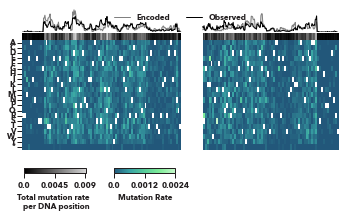

In [17]:
# ====================== LOAD RL8 DATA AND DEFINE REFERENCE SEQUENCES ======================

RL8_mutations = pd.read_csv("/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/RL8/combined/enrichments/AA/RL8_BC1_S1_combined_roiFalse_AA_enrichment_relative.csv", index_col=0)
RL8_DNA_mutations = pd.read_csv("/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/RL8/combined/enrichments/DNA/RL8_BC1_S1_combined_roiFalse_DNA_enrichment_relative.csv", index_col=0)
RL8_encoded_muts = pd.read_csv("/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/P0111_RetronLib/BC3_R1/blastpipeline/enrichments/BC3_RL_encoded_mutations.csv", index_col=0).T


RL8_observed_ref = "CGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAAGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTG"

RL8_encoded_ref = "CAGCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTGC"
cut_left = RL8_encoded_ref.index("CGCCGCATGGAAGCGATTAA")
cut_right = RL8_encoded_ref.index("TGGATAACCGCGTG") + len("TGGATAACCGCGTG")



# ====================== PROCESS RL8 DNA MUTATION DATA ======================

# --- Identify columns (positions) that contain only NaN values ---
# These positions likely have very low sequencing coverage and no reliable data
empty_cols = RL8_DNA_mutations.columns[RL8_DNA_mutations.isna().all()]

# --- Calculate the total relative mutation rate at each position ---
RL8_DNA_muts_prop = RL8_DNA_mutations.sum()

# --- Identify and mask the position with the highest mutation rate ---
# This is likely a silent mutation (e.g. a technical artifact or contamination)
mask_max = RL8_DNA_muts_prop.idxmax()
RL8_DNA_muts_prop[mask_max] = np.nan

# --- Normalize mutation proportions across all valid positions ---
RL8_DNA_muts_prop = RL8_DNA_muts_prop/RL8_DNA_muts_prop.sum()

# --- Sum total mutation counts per position (raw, unnormalized) ---
RL8_DNA_mutations_sum = RL8_DNA_mutations.sum()  

# --- Mask problematic positions again (masking is lost after `.sum()` operation) ---
RL8_DNA_mutations_sum[mask_max] = np.nan
RL8_DNA_mutations_sum[empty_cols] = np.nan
RL8_DNA_muts_prop[mask_max] = np.nan
RL8_DNA_muts_prop[empty_cols] = np.nan

# ====================== PROCESS RL8 ENCODED MUTATIONS ======================


# --- Cut the encoded mutation matrix to match the observed reference frame ---
# Keep only the region between cut_left and cut_right (matching the actual DNA window)
RL8_encoded_muts = RL8_encoded_muts.iloc[:,cut_left:cut_right]

# --- Mask positions with low coverage (same as in the observed DNA mutations) ---
# Identify positions (columns) in the observed data that have only NaN values
empty_cols = RL8_DNA_mutations.columns[RL8_DNA_mutations.isna().all()]
empty_cols = [int(empty_col) for empty_col in empty_cols]

# --- Extract encoded mutation proportions from the first row ---
RL8_encoded_muts_prop = RL8_encoded_muts.iloc[0,:].values

# --- Replace low-coverage positions and the masked maximum with NaN ---
RL8_encoded_muts_prop = pd.DataFrame([RL8_encoded_muts_prop[i] if i not in empty_cols+ [int(mask_max)] else np.nan for i in range(len(RL8_encoded_muts_prop))])


# --- Normalize the encoded mutation profile so that the sum is 1 ---
RL8_encoded_muts_prop = (RL8_encoded_muts_prop/RL8_encoded_muts_prop.sum()).values.flatten()

# ====================== PLOT ENCODED VS OBSERVED MUTATION PROFILES ======================

light_gray = "black" 
dark_gray = "#D3D3D3"

gray_cmap = mcolors.LinearSegmentedColormap.from_list("custom_gray", [light_gray, dark_gray])


fig, axes = plt.subplots(3,1, figsize=(wi*0.8, hi/3), height_ratios=[0.3, 0.08, 1.3])
## put plots closer together
plt.subplots_adjust(hspace=0.01)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)

# --- Plot the encoded mutation profile (gray line) ---
axes[0].plot(RL8_encoded_muts_prop, label = "Encoded", linewidth = 1, color = "grey")

# --- Plot the observed mutation profile (black line) ---
axes[0].plot(RL8_DNA_muts_prop, label = "Observed", linewidth = 1, color = "black")
axes[0].set_xlim(0, len(RL8_encoded_muts.columns))
axes[0].set_ylim(0,0.012)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].legend(frameon = False, ncol=2)
axes[0].fill_between(range(len(RL8_encoded_muts_prop)), RL8_encoded_muts_prop, RL8_DNA_muts_prop, color= "lightgrey", alpha=0.5)

sns.heatmap(pd.DataFrame(RL8_DNA_mutations_sum).T, cmap= gray_cmap, cbar = False, ax = axes[1], xticklabels=False, yticklabels=False)


colors = [
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"   # Light pastel green
]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_green_blue", colors, N=256)
sns.heatmap(RL8_mutations, cmap= custom_cmap, cbar = False, ax = axes[2],yticklabels=True,xticklabels=False)
axes[2].set_yticklabels(axes[2].get_yticklabels(), rotation=0, fontsize = 8)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=1)
axes[2].tick_params(axis='y', pad=2)  
cbar_ax = fig.add_axes([0.13, -0.0, 0.15, 0.03])


cbar = fig.colorbar(axes[1].collections[0], cax=cbar_ax, orientation="horizontal")

ticks_gray = [0.000, 0.0045, 0.009]
cbar.set_ticks(ticks_gray)
cbar.ax.set_xticklabels([0.000, 0.0045, 0.009]) 

cbar.set_label("Total mutation rate  \n per DNA position")

cbar_ax = fig.add_axes([0.35, -0.0, 0.15, 0.03])

cbar = fig.colorbar(axes[2].collections[0], cax=cbar_ax, orientation = "horizontal")
ticks_colored = [0.0, 0.0012, 0.0024]
cbar.set_ticks(ticks_colored)
cbar.ax.set_xticklabels([0.0, 0.0012, 0.0024]) 
cbar.set_label("Mutation Rate")


# plt.savefig("final_output/RL8/RL8_encoded_vs_observed.pdf", bbox_inches='tight')
# plt.savefig("final_output/RL8/RL8_encoded_vs_observed.png", bbox_inches='tight')

plt.show()


## Figure 5G: Overview of POGO-PANCE evolution of AraC R2 S170 LOV using the linker library, enrichment rates overtime are shown using nanopore data
-----------------------

Enrichment analysis from a POGO-PANCE evolution campaign using R2-LOV as input. Mutation frequencies in the left and right linkers of AraC-LOV were quantified by Nanopore sequencing. Residues enriched above `0.10` are shaded <span style="color: yellow"><b>yellow</b></span>. Variant naming conventions are in Supplemental Table X; additional linker library characterization and phage titer data are provided in Figures S13 and S14.

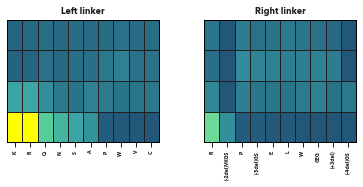

In [18]:
# --- Load linker frequency data (R1 = left linker, R2 = right linker) for multiple barcodes ---

all_left_linkers = pd.DataFrame(dtype = float)
all_right_linkers = pd.DataFrame(dtype = float)
all_linker_vars = []
barcodes =  [13, 16, 19, 21]
barcodes = [str(bc) for bc in barcodes]


# --- Load and concatenate linker distributions for each barcode ---
for barcode in barcodes: 
    FigFolder = f"/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/Nanopore_P0115/barcode{barcode}/"
    left_linkers = pd.read_csv(f"{FigFolder}/linker_distribution_R1.csv", index_col = 0).T
    left_linkers.index = [str(barcode)]
    all_left_linkers = pd.concat([all_left_linkers, left_linkers], axis = 0)

    right_linkers = pd.read_csv(f"{FigFolder}/linker_distribution_R2.csv", index_col = 0).T
    all_right_linkers = pd.concat([all_right_linkers, right_linkers], axis = 0)

# --- Format indices and normalize to mutation rates (0-1 scale) ---
all_right_linkers.index = [str(bc) for bc in barcodes]
all_left_linkers.index = [str(bc) for bc in barcodes]

all_right_linkers.fillna(0, inplace = True)
all_left_linkers.fillna(0, inplace = True)

all_right_linkers = all_right_linkers/100 #calcuate mutation rates from percentages
all_left_linkers = all_left_linkers/100

# --- Select top N linkers by variance across timepoints ---
n_linkers = 10 

# --- Left linker: calculate variance and select top variants ---
left_vars = all_left_linkers.var()
left_quant = n_linkers/all_left_linkers.shape[1]
left_quantile_threshold = np.percentile(left_vars, 100-left_quant*100)
left_top_indices = [i for i, var in enumerate(left_vars) if var >= left_quantile_threshold]
left_top_vars = all_left_linkers.iloc[:,left_top_indices]

# --- Right linker: calculate variance and select top variants ---
right_vars = all_right_linkers.var()
right_quant = n_linkers/all_right_linkers.shape[1]
right_quantile_threshold = np.percentile(right_vars, 100-right_quant*100)
right_top_indices = [i for i, var in enumerate(right_vars) if var >= right_quantile_threshold]
right_top_vars = all_right_linkers.iloc[:,right_top_indices]

# --- Sort variants by frequency at final timepoint (last barcode) ---
right_top_vars = right_top_vars.sort_values(right_top_vars.last_valid_index(), axis=1,ascending=False)
left_top_vars = left_top_vars.sort_values(left_top_vars.last_valid_index(), axis=1,ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(6.25, 2.25))
fig.subplots_adjust(wspace=0.3)

my_cmap = custom_cmap
my_cmap.set_over('Yellow')

# --- Left linker heatmap ---
sns.heatmap(left_top_vars, cmap=my_cmap, vmax=0.10, ax=ax[0], cbar=False,
            yticklabels=False, xticklabels=True, linecolor="#231F20", linewidths=1)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title("Left linker")
for label in ax[0].get_xticklabels():
    label.set_fontsize(5)
for spine in ax[0].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor('black')

# --- Right linker heatmap ---
sns.heatmap(right_top_vars, cmap=my_cmap, vmax=0.10, ax=ax[1], cbar=False,
            yticklabels=False, xticklabels=True, linecolor="#231F20", linewidths=1)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title("Right linker")
for label in ax[1].get_xticklabels():
    label.set_fontsize(5)
for spine in ax[1].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor('black')

plt.show()

# plt.savefig(f"final_output/Nanopore_P0115/linker_evolution_heatmap{'_'.join(barcodes)}.png", bbox_inches="tight")
# plt.savefig(f"final_output/Nanopore_P0115/linker_evolution_heatmap{'_'.join(barcodes)}.pdf", bbox_inches="tight", dpi=600)

## Figure 5H: Dot plot of enrichment after initial linker mutagenesis versus the enrichment of linker variants in the final day
-------------------
Dot plot comparing enrichment after mutagenesis (x-axis) versus final positive selection (y-axis). Left and right linker libraries are indicated.

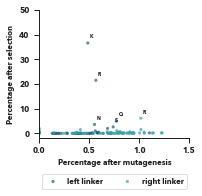

In [19]:
# --- Load linker frequency data (R1 = left linker, R2 = right linker) for two barcodes ---
left_linker_BC1 = pd.read_csv("/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/Nanopore_P0115/barcode13/linker_distribution_R1.csv", index_col=0).T
right_linker_BC1 = pd.read_csv("/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/Nanopore_P0115/barcode13/linker_distribution_R2.csv", index_col=0).T

left_linker_BC2 = pd.read_csv("/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/Nanopore_P0115/barcode21/linker_distribution_R1.csv", index_col=0).T
right_linker_BC2 = pd.read_csv("/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/final_output/Nanopore_P0115/barcode21/linker_distribution_R2.csv", index_col=0).T

# --- Combine right linker variants across both barcodes ---
all_right_linkers_vars = list(set(list(right_linker_BC1.columns) + list(right_linker_BC2.columns)))
all_right_linker_perc = pd.DataFrame(columns = all_right_linkers_vars, index = ["BC1", "BC2"], data = 0, dtype=np.float64)


# --- Fill percentages for each right linker from BC1 and BC2 ---
for linker in all_right_linkers_vars: 
    if linker in right_linker_BC1.columns:
        all_right_linker_perc.loc["BC1", linker] = right_linker_BC1.loc["0", linker]
    if linker in right_linker_BC2.columns:
        all_right_linker_perc.loc["BC2", linker] = right_linker_BC2.loc["0", linker] 


# --- Combine left linker variants across both barcodes ---

all_left_linkers_vars = list(set(list(left_linker_BC1.columns) + list(left_linker_BC2.columns)))
all_left_linker_perc = pd.DataFrame(columns = all_left_linkers_vars, index = ["BC1", "BC2"], data = 0, dtype=np.float64)

# --- Fill percentages for each right linker from BC1 and BC2 ---
for linker in all_left_linkers_vars:
    if linker in left_linker_BC1.columns:
        all_left_linker_perc.loc["BC1", linker] = left_linker_BC1.loc["0",linker]
    if linker in left_linker_BC2.columns:
        all_left_linker_perc.loc["BC2", linker] = left_linker_BC2.loc["0",linker]


# --- Plot scatter plot comparing BC1 vs BC2 linker abundances ---
fig, ax = plt.subplots(figsize = (wi3*1.2, hi/3))
compared_to = "BC2"

# --- Left linker scatter ---
plt.scatter(all_left_linker_perc.loc["BC1",:], all_left_linker_perc.loc[compared_to,:], color = "#22577A", edgecolors='none',alpha=0.7, label = "left linker", s = 10)

# --- Right linker scatter ---
plt.scatter(all_right_linker_perc.loc["BC1",:], all_right_linker_perc.loc[compared_to,:], color = "#38A3A5",edgecolors='none', alpha=0.7, label = "right linker", s = 10)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.tick_params(axis='y', which='major', pad=5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),ncol =2)
plt.ylim(0, 50)
ax.set_ylim(-2, 50)

plt.xlim(0, 1.5)
ax.set_xlim(0, 1.5)
ax.set_xticks(np.arange(0, 1.6, 0.5))
plt.xlabel("Percentage after mutagenesis")
plt.ylabel("Percentage after selection")
for i, (x, y) in enumerate(zip(all_left_linker_perc.loc["BC1", :], all_left_linker_perc.loc[compared_to, :])):
    if y > 2:  
        plt.annotate(all_left_linker_perc.columns[i], (x, y), textcoords="offset points", xytext=(2,5), ha='left', fontsize=5)

for i, (x, y) in enumerate(zip(all_right_linker_perc.loc["BC1", :], all_right_linker_perc.loc[compared_to, :])):
    if y > 2:  
        plt.annotate(all_right_linker_perc.columns[i], (x, y), textcoords="offset points", xytext=(2,5), ha='left', fontsize=5)

# plt.savefig(f"final_output/Nanopore_P0115/Linker_evolution_scatter_Barcode_13_vs_21.pdf", bbox_inches='tight', dpi = 600)
# plt.savefig(f"final_output/Nanopore_P0115/Linker_evolution_scatter_Barcode_13_vs_21.png", bbox_inches='tight')

plt.show()


## Figure 5I: Alphafold3 structure comparison of AraC S170 LOV and AraC R2 S170 LOV LdelK (a linker variant).
---------------------
AlphaFold3-predicted structures of AraC S170-AsLOV2 WT and R2 S170-AsLOV2 in which the left SG linker is replaced with a single lysine (LdelK). AraC, AsLOV2, and linker regions are colored pink, blue, and green, respectively.

![Alt Text](/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/figure_notebooks/figure_illustrations/Figure_5I.png)

## Figure 5J: Bar chart comparing AraC S170 Variants in the dark or light, WT, R2, the best original pogo-pance variant, and 5 selected enriched linkers from the linker evolution are shown on a log scale.
-------------
Functional validation of enriched R2-LOV linker variants. RFP fluorescence, normalized to OD600, was measured in the presence or absence of blue light. Data represent mean ± s.e.m. from n = 3 biological replicates. Figure created with GraphPad Prism.

![Alt Text](/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/figure_notebooks/figure_illustrations/Figure_5J.png)